# Exploratory Data Analysis

## Python Packages

In [1]:
# Data Science
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# ignore all warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler


Firt, let's start with reading the data

In [2]:
df = pd.read_csv('../data/loan_data.csv')
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


Brief stat value of all features:

In [3]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,575775.000000,575775.000000,575775.000000,575775.000000,575775.000000,5.757750e+05,575425.000000,575774.000000,575774.000000,...,3065.0,3065.000000,3065.0,3065.000000,2498.000000,3065.000000,3065.000000,12165.000000,12165.000000,12165.000000
mean,NaN,15377.332031,15377.332031,15371.794494,12.639395,446.919058,7.734492e+04,19.325916,0.322446,697.006404,...,3.0,131.388623,3.0,14.310930,390.490809,10199.407834,189.347837,4962.616575,47.460089,13.028935
std,NaN,8998.220603,8998.220603,8995.464455,4.551844,257.285497,7.537701e+04,13.810167,0.894745,32.493678,...,0.0,111.897703,0.0,9.504649,330.814806,6950.743722,185.749985,3620.231888,6.469832,7.811438
min,NaN,1000.000000,1000.000000,900.000000,5.310000,14.010000,0.000000e+00,0.000000,0.000000,660.000000,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.020000,107.000000,0.450000,0.000000
25%,NaN,8400.000000,8400.000000,8400.000000,9.170000,260.320000,4.600000e+04,12.300000,0.000000,670.000000,...,3.0,46.230000,3.0,7.000000,137.842500,4583.370000,44.410000,2187.000000,45.000000,6.000000
50%,NaN,14000.000000,14000.000000,14000.000000,12.290000,384.100000,6.500000e+04,18.410000,0.000000,690.000000,...,3.0,102.640000,3.0,15.000000,307.230000,8848.370000,135.390000,4222.530000,45.000000,12.000000
75%,NaN,20000.000000,20000.000000,20000.000000,15.590000,591.180000,9.200000e+04,25.290000,0.000000,715.000000,...,3.0,182.550000,3.0,23.000000,538.980000,14381.080000,284.180000,6814.060000,50.000000,18.000000
max,NaN,40000.000000,40000.000000,40000.000000,30.990000,1714.540000,1.099920e+07,999.000000,39.000000,845.000000,...,3.0,923.400000,3.0,30.000000,2535.660000,40306.410000,1247.480000,30000.000000,166.670000,112.000000


Total records:

In [4]:
df.shape

(575779, 151)

In [5]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

There are 151 total features, but I will not use all of them. I will pick features that I believe that are good for training PD, EAD and LGD. We just need a small good amount of features, and here is the list of features: <br>

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>7</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>8</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>9</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>10</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>11</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>12</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>13</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>14</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>15</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>16</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>17</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>18</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>19</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>20</th>
      <td>delinq_2yrs</td>
      <td>Number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.</td>
    </tr>
    <tr>
      <th>21</th>
      <td>inq_last_6mths</td>
      <td>Number of inquiries paid in last 6 months.</td>
    </tr>
  </tbody>
</table>

In [6]:
# the id and memeber_id will not be served for prediction, but for mapping, and future investigation
ID_FEATURES = ['id']
SELECTED_FEATURES = [
    "loan_amnt", "term", "int_rate", "installment", "grade", "emp_title", "emp_length", 
    "home_ownership", "annual_inc", "verification_status", "issue_d", "loan_status", "purpose", "addr_state", 
    "dti", "earliest_cr_line", "open_acc", "pub_rec", "total_acc", "initial_list_status", "delinq_2yrs", 
    "inq_last_6mths",
]

Then narrow down the dimensions/features of the data

In [7]:
df = df[ID_FEATURES + SELECTED_FEATURES]
df.head(3)

,id,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,...,purpose,addr_state,dti,earliest_cr_line,open_acc,pub_rec,total_acc,initial_list_status,delinq_2yrs,inq_last_6mths
0,68407277,3600.0,36 months,13.99,123.03,C,leadman,10+ years,MORTGAGE,55000.0,...,debt_consolidation,PA,5.91,Aug-2003,7.0,0.0,13.0,w,0.0,1.0
1,68355089,24700.0,36 months,11.99,820.28,C,Engineer,10+ years,MORTGAGE,65000.0,...,small_business,SD,16.06,Dec-1999,22.0,0.0,38.0,w,1.0,4.0
2,68341763,20000.0,60 months,10.78,432.66,B,truck driver,10+ years,MORTGAGE,63000.0,...,home_improvement,IL,10.78,Aug-2000,6.0,0.0,18.0,w,0.0,0.0


In [8]:
numerical_features = df.select_dtypes(include=['int', 'float']).columns

categorical_features = df.select_dtypes(include=['object']).columns


since there are 3 main models: PD, LGD, and EAD, Let's start with PD first
## Probability of Defalt
The target for pd is loan_status which is the status of to consider if it is default or not. <br>
First, Let's begin with heat map since it the easiest way to obsesrve all correlation among numerical features

<AxesSubplot:>

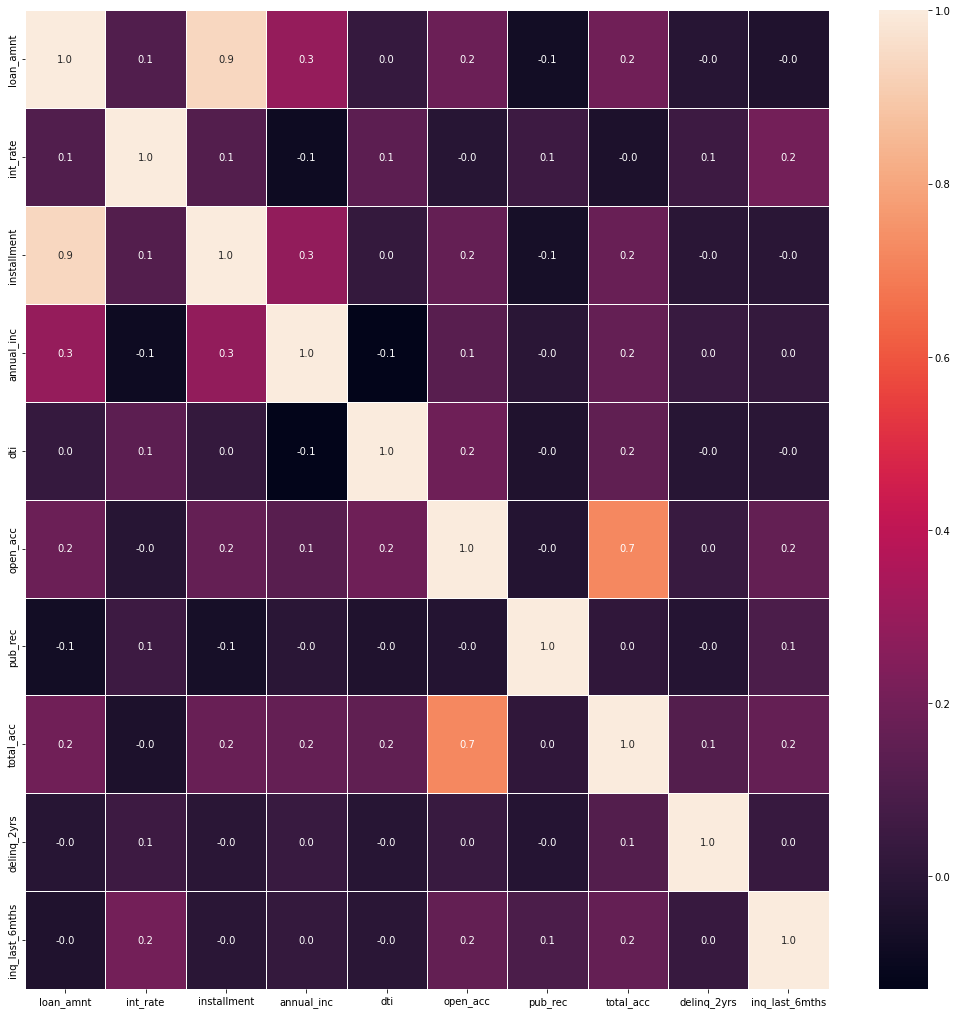

In [9]:
fig,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


<AxesSubplot:>

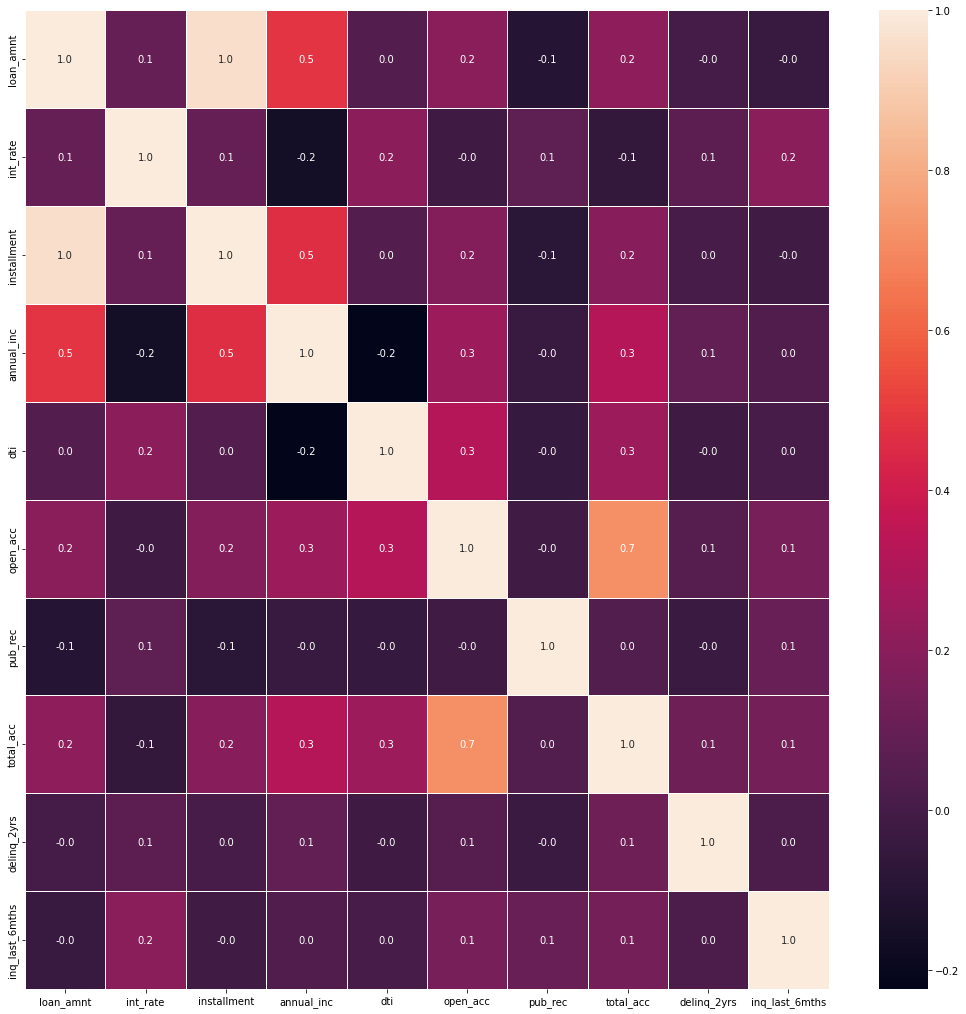

In [10]:
fig,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(method='spearman'), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


In [11]:
NON_DEFAULT_CATEGORIES = [
    "Fully Paid",
]
TARGET_VARIABLE = "default"

df[TARGET_VARIABLE] = df["loan_status"].isin(NON_DEFAULT_CATEGORIES).astype(float)

In [40]:
y = df[TARGET_VARIABLE]
numerical_features_df = df[numerical_features]

# Standardize the numerical features
scaler = StandardScaler()
numerical_features_df = pd.DataFrame(scaler.fit_transform(numerical_features_df), columns=numerical_features)

# Concatenate the target variable and standardized numerical features
temp_df = pd.concat([y, numerical_features_df], axis=1)

temp_df = pd.melt(temp_df, id_vars=TARGET_VARIABLE, var_name='features', value_name='value')

plt.figure(figsize=(10, 10))
sns.violinplot(x="features", y="value", hue=TARGET_VARIABLE, data=temp_df,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()


KeyboardInterrupt: 

In [14]:
melted_data

,default,features,value
0,0.0,id,68407277
1,0.0,id,68355089
2,0.0,id,68341763
3,0.0,id,66310712
4,0.0,id,68476807
...,...,...,...
13242912,0.0,inq_last_6mths,0.537435
13242913,0.0,inq_last_6mths,1.724831
13242914,0.0,inq_last_6mths,-0.64996
13242915,0.0,inq_last_6mths,1.724831
